# Minimal Example using TensorFlow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Data generation (same as in section 4, but with the np.savez(...) line of code added)

observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations, 1)) # 1000x1
zs = np.random.uniform(-10, 10, (observations, 1)) # 1000x1

generated_inputs = np.column_stack((xs, zs)) # 1000x2
noise = np.random.uniform(-1, 1, (observations, 1)) # 1000x1
generated_targets = 2*xs - 3*zs + 5 + noise # 1000x1

np.savez('minimal_ex_tf', inputs=generated_inputs, targets=generated_targets)
# .npz is basically TF's file type, which stores arrays/tensors.
# Common to open data like a .csv, preprocess it, then save as .npz file. Then later, build algorithm w/ .npz.
# Note: The above keys, "inputs" and "targets" can be called anything

In [ ]:
# Approach A (simpler with default initializers and learning rate): Load the .npz file and Train the model

training_data = np.load('minimal_ex_tf.npz')
# Note: Access tensors using keys similar to a dict -> Ex: training_data['inputs'] or training_data['targets']

input_size = 2 # xs and zs
output_size = 1 # Y or generated_targets

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(output_size)
    ]
)
# Sequential() function specifies how the model will be "laid down" ("stacks layers") and can also initialize weights
# Dense(output size) takes inputs provided to the model and calculates the dot product of inputs and weights and adds bias
# ^ (optional) also applies activation function

model.compile(optimizer='sgd', loss='mean_squared_error')
# model.compile(optimizer, loss) configures the model for training. "sgd" = stochastic gradient descent
# Use MSE for L2-norm. 
# Note: Another loss for regression in "Huber Loss," which is better when we have outliers, as it is less sensitive to them. Combines absolute and squared loss.

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)
# model.fit(inputs, targets) fits (trains) the model
# epochs = iterations over the full dataset
# verbose=0 -> no output. verbose=1 -> progress bar + details. verbose=2 -> details, no progress bar.

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 43.1009 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 5.7749
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 1.8346
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 0.7594
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 0.4523
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.3552
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.3296
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 0.3527
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 0.3251
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.3044
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.3245
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.3382
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.3399
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 0.3372
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

In [80]:
# Approach B: Load the .npz file and Train the model, but with initializers in Dense() and custom_optomizer in compile
# This approach is more explicit to match the weight/bias initializer and learning rate from the numpy example in section 4

training_data = np.load('tf_intro.npz')

input_size = 2
output_size = 1

# Below 3 lines are updated
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            output_size,
            kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1), # kernel means weight here
            bias_initializer=tf.random_uniform_initializer(-0.1, 0.1)
        )
    ]
)
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 60.7106 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 1.7136
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 0.4623
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 0.3898
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 0.3609
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 0.5772
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 0.3784
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 0.3744
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 0.3751
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.3692
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 0.3950
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 0.4659
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.4140
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.4366
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

In [7]:
# Extract the weights and bias

weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
print(weights, ',', bias) # [[ 2.0561464] [-3.0132828]] , [5.0186114]

[[ 2.0302706]
 [-2.9958396]] , [4.9941783]


In [8]:
# Make "predictions" (using training data and compare to targets)

predictions = model.predict_on_batch(training_data['inputs'])
# model.predict_on_batch(data) calculates the outputs given inputs

# Compare the first 5 observations
print(predictions.round(1)[:5])
print(training_data['targets'].round(1)[:5])

[[-14.6]
 [ 24.7]
 [ 15.9]
 [ 20.5]
 [  2.3]]
[[-13.8]
 [ 24.2]
 [ 16.1]
 [ 20.6]
 [  1.7]]


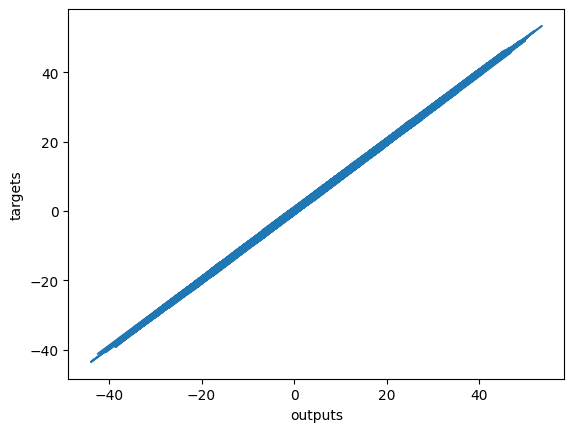

In [9]:
# Plot the data

plt.plot(np.squeeze(predictions), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# Note to self: Not sure why np.squeeze is needed since predictions and targets are both 1000x1